In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import scanpy as sc
from anndata import AnnData
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
path = "/home/nas2/biod/yangchenghui/my_ych_project_P22brain_new/"

In [6]:
RNA_data = pd.read_csv(path + 'P22_counts/P22_rna_counts.txt', sep='\t', index_col=0)
ATAC_data = pd.read_csv(path + 'P22_counts/P22_peak_counts.txt', sep='\t', index_col=0)

In [7]:
RNA_data

,CTAAGGTCTTGCTGGA,CTAAGGTCACACAGAA,CTAAGGTCACAGCAGA,CTAAGGTCACCTCCAA,CTAAGGTCACGCTCGA,CTAAGGTCACGTATCA,CTAAGGTCACTATGCA,CTAAGGTCAGAGTCAA,CTAAGGTCAGATCGCA,CTAAGGTCAGCAGGAA,...,GAACAGGCCGGATTGC,GAACAGGCCTAAGGTC,GAACAGGCGAACAGGC,GAACAGGCGACAGTGC,GAACAGGCGAGTTAGC,GAACAGGCGATGAATC,GAACAGGCGCCAAGAC,GAACAGGCCGGAAGAA,GAACAGGCGTGACAAG,GAACAGGCGAACCAGA
Gm26752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ppp1r14c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Plekhg1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mthfd1l,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Akap12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uty,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ddx3y,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
Gm20775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm21857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
ATAC_data

,CTAAGGTCTTGCTGGA,CTAAGGTCACACAGAA,CTAAGGTCACAGCAGA,CTAAGGTCACCTCCAA,CTAAGGTCACGCTCGA,CTAAGGTCACGTATCA,CTAAGGTCACTATGCA,CTAAGGTCAGAGTCAA,CTAAGGTCAGATCGCA,CTAAGGTCAGCAGGAA,...,GAACAGGCCGGATTGC,GAACAGGCCTAAGGTC,GAACAGGCGAACAGGC,GAACAGGCGACAGTGC,GAACAGGCGAGTTAGC,GAACAGGCGATGAATC,GAACAGGCGCCAAGAC,GAACAGGCCGGAAGAA,GAACAGGCGTGACAAG,GAACAGGCGAACCAGA
chr1-3094734-3095650,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
chr1-3119757-3120179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1-3120267-3120653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1-3121314-3122051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1-3264998-3265766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GL456216.1-31908-32576,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GL456216.1-43983-44510,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
GL456216.1-48771-49683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JH584292.1-12571-13497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
spatial = pd.read_csv(path + "P22_counts/Spots.coords.tsv.gz",sep='\t', index_col=0, header=None)
spatial = np.array(spatial)

In [12]:
X1 = RNA_data.T
(n1, d1) = X1.shape
X2 = ATAC_data.T
(n2, d2) = X2.shape

# SpatialGLUE

参照https://spatialglue-tutorials.readthedocs.io/en/latest/Tutorial%204_data%20integration%20for%20mouse%20brain%20Spatial-epigenome-transcriptome.html

In [1]:
import os
import torch
import pandas as pd
import scanpy as sc

In [2]:
import SpatialGlue

In [3]:
device = torch.device('cuda:6' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = '/scbio4/tools/R/R-4.0.3_openblas/R-4.0.3'
device

device(type='cuda', index=6)

In [10]:
torch.cuda.is_available()

True

In [11]:
# Specify data type
data_type = 'Spatial-epigenome-transcriptome'

# Fix random seed
from SpatialGlue.preprocess import fix_seed
random_seed = 2022
fix_seed(random_seed)

load data

In [14]:
rna_adata = AnnData(X1)
rna_adata.obs['batch'] = np.array(['RNA'] * n1)
rna_adata.obsm['spatial'] = spatial

atac_adata = AnnData(X2)
atac_adata.obs['batch'] = np.array(['ATAC'] * n2)
atac_adata.obsm['spatial'] = spatial
rna_adata, atac_adata

(AnnData object with n_obs × n_vars = 9215 × 18005
     obs: 'batch'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 9215 × 121068
     obs: 'batch'
     obsm: 'spatial')

In [15]:
adata_omics1 = rna_adata
adata_omics2 = atac_adata

Pre-processing data

In [16]:
from SpatialGlue.preprocess import clr_normalize_each_cell, pca, lsi

# RNA
sc.pp.filter_genes(adata_omics1, min_cells=10)
# sc.pp.filter_cells(adata_omics1, min_genes=200)

sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)
sc.pp.scale(adata_omics1)

adata_omics1_high =  adata_omics1[:, adata_omics1.var['highly_variable']]
adata_omics1.obsm['feat'] = pca(adata_omics1_high, n_comps=50)

# ATAC
adata_omics2 = adata_omics2[adata_omics1.obs_names].copy() # .obsm['X_lsi'] represents the dimension reduced feature
if 'X_lsi' not in adata_omics2.obsm.keys():
    sc.pp.highly_variable_genes(adata_omics2, flavor="seurat_v3", n_top_genes=3000)
    lsi(adata_omics2, use_highly_variable=False, n_components=51)

adata_omics2.obsm['feat'] = adata_omics2.obsm['X_lsi'].copy()

Constructing neighbor graph

In [17]:
from SpatialGlue.preprocess import construct_neighbor_graph
data = construct_neighbor_graph(adata_omics1, adata_omics2, datatype=data_type)

Training the model

In [18]:
# define model
from SpatialGlue.SpatialGlue_pyG import Train_SpatialGlue
model = Train_SpatialGlue(data, datatype=data_type, device=device)

# train model
output = model.train()

/home/yangchenghui/anaconda3/envs/SpatialGlue/lib/python3.8/site-packages/SpatialGlue/preprocess.py:132: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:641.)
  return torch.sparse.FloatTensor(indices, values, shape)
  0%|          | 0/1600 [00:00<?, ?it/s]/home/yangchenghui/anaconda3/envs/SpatialGlue/lib/python3.8/site-packages/SpatialGlue/model.py:212: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  self.alpha = F.softmax(torch.squeeze(self.vu) + 1e-6)
100%|██████████| 1600/1600 [01:07<00:00, 23.88it/s]


Model training finished!



In [19]:
adata = adata_omics1.copy()
adata.obsm['emb_latent_omics1'] = output['emb_latent_omics1']
adata.obsm['emb_latent_omics2'] = output['emb_latent_omics2']
adata.obsm['SpatialGlue'] = output['SpatialGlue']
adata.obsm['alpha'] = output['alpha']
adata.obsm['alpha_omics1'] = output['alpha_omics1']
adata.obsm['alpha_omics2'] = output['alpha_omics2']

In [20]:
adata.obsm['SpatialGlue'].shape

(9215, 64)

Cross-omics integrative analysis

In [4]:
from anndata import AnnData
import scanpy as sc

In [59]:
# 建立adata_aligned
adata_aligned = AnnData(adata.obsm['SpatialGlue']).copy()

# sc.pp.scale(adata_aligned)
# sc.tl.pca(adata_aligned)
sc.pp.neighbors(adata_aligned, n_neighbors=40)
sc.tl.umap(adata_aligned)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/yangchenghui/anaconda3/envs/SpatialGlue/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'leiden_clusters'}, xlabel='spatial1', ylabel='spatial2'>]

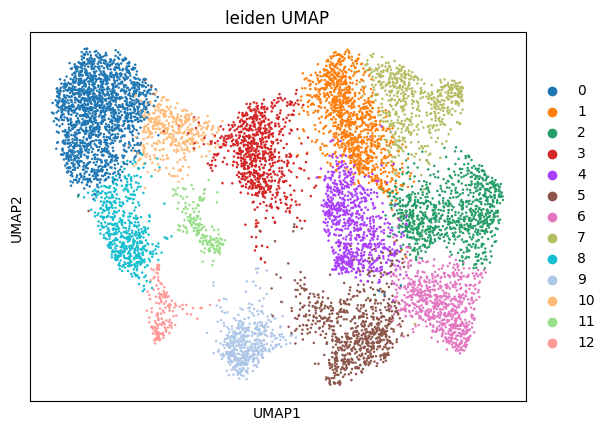

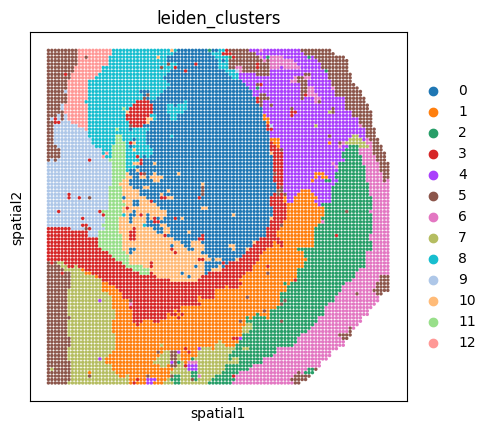

In [61]:
sc.tl.leiden(adata_aligned, key_added='leiden_clusters',resolution=1.2)
sc.pl.umap(adata_aligned, color = ['leiden_clusters'], title=['leiden UMAP'],show = False)

adata_aligned.obsm['spatial'] = spatial
sc.pl.spatial(adata_aligned, img_key=None, color="leiden_clusters",spot_size = 1,show=False)

In [33]:
adata_aligned.write_h5ad("/home/nas2/biod/yangchenghui/my_ych_project_P22brain_new/P22_in_spatialGLUE/P22_SpatialGLUE_adata.h5ad")

<Axes: >

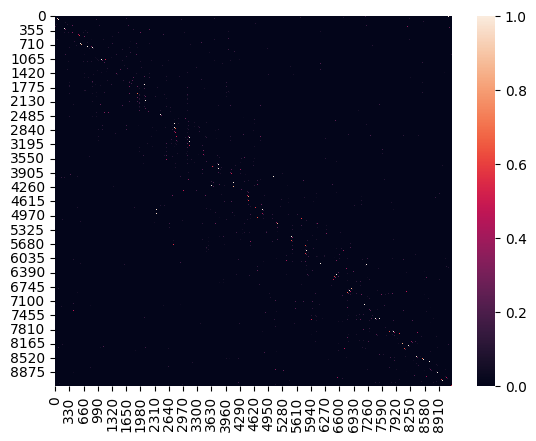

In [55]:
smi = adata_aligned.obsp['connectivities'].toarray()
np.fill_diagonal(smi, 1)
sns.heatmap(smi)

In [56]:
import numpy as np

# 获取每一行中最大的 5 个值
max_5_values = np.sort(smi, axis=1)[:10, -5:]
print("每一行中最大的5个值：\n", max_5_values)

每一行中最大的5个值：
 [[0.6294382  0.98286706 0.99999994 1.         1.        ]
 [0.37852892 0.86743724 0.95594025 1.         1.        ]
 [0.52783895 0.8905782  0.95594025 1.         1.        ]
 [0.48930228 0.87982225 1.         1.         1.        ]
 [0.6101823  0.64257765 0.79359573 1.         1.        ]
 [0.6453854  0.79359573 0.8862714  1.         1.        ]
 [0.4510333  0.72932565 0.7557431  1.         1.        ]
 [0.81719077 1.         1.         1.         1.        ]
 [0.47319576 0.62614733 0.8514272  1.         1.        ]
 [0.75793207 0.8053733  1.         1.         1.        ]]


In [57]:
cost = np.array(np.exp(1 - smi))
cost = cost - np.min(cost)

Text(0.5, 1.0, 'cost')

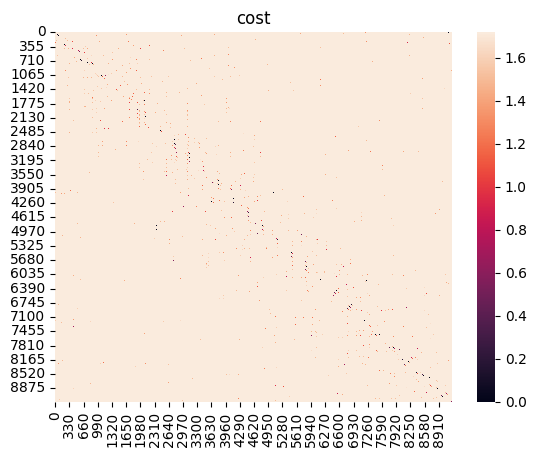

In [58]:
sns.heatmap(cost)
pl.title('cost')

In [2]:
import anndata as ad
adata_aligned = ad.read("/home/nas2/biod/yangchenghui/my_ych_project_P22brain_new/P22_in_spatialGLUE/P22_SpatialGLUE_adata.h5ad")
adata_aligned

AnnData object with n_obs × n_vars = 9215 × 64
    obs: 'leiden_clusters'
    uns: 'leiden', 'leiden_clusters_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

/home/yangchenghui/anaconda3/envs/SpatialGlue/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


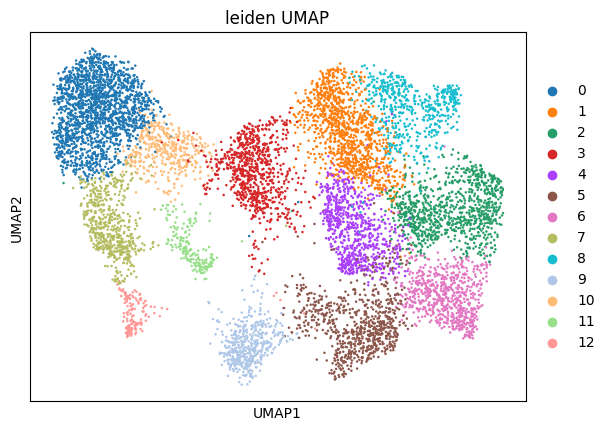

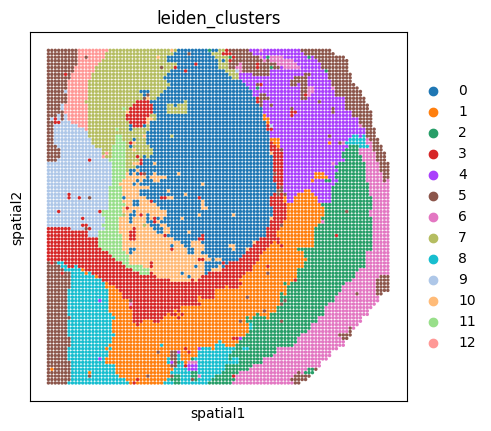

In [7]:
sc.pl.umap(adata_aligned, color = ['leiden_clusters'], title=['leiden UMAP'],show = False)
pl.savefig("/home/nas2/biod/yangchenghui/my_ych_project_P22brain_new/P22_in_spatialGLUE/P22_SpatialGLUE_embedding.pdf")

sc.pl.spatial(adata_aligned, img_key=None, color="leiden_clusters",spot_size = 1,show=False)
pl.savefig("/home/nas2/biod/yangchenghui/my_ych_project_P22brain_new/P22_in_spatialGLUE/P22_SpatialGLUE_embedding_spatial.pdf")